In [19]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import warnings

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

from astropy.table import Table, Column
from astropy.utils.console import ProgressBar

from riker.galaxy import GalaxyMap
from riker.data import BeneMassAgeZMaps


warnings.filterwarnings("ignore")

plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 25})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Get TNG data and the galaxy catalog

In [33]:
# Input HDF5 from simulation
tng_dir = '/Users/song/data/massive/simulation/riker/tng'

# HDF5 files
tng_file = os.path.join(tng_dir, 'galaxies_tng100_072_agez_highres.hdf5')

tng_label = 'tng100_z0.4_hres'

tng_data = BeneMassAgeZMaps(tng_file, label=tng_label)

tng_galaxies = tng_data.sum_table(save=False)

### Get Illustris data and the galaxy catalog

In [34]:
# Input HDF5 from simulation
ori_dir = '/Users/song/data/massive/simulation/riker/ori/'

# HDF5 files
ori_file = os.path.join(ori_dir, 'galaxies_orig_108_agez_highres.hdf5')

ori_label = 'ori100_z0.4_hres'

ori_data = BeneMassAgeZMaps(ori_file, label=ori_label)

ori_galaxies = ori_data.sum_table(save=False)

### Get the aperture stellar mass in 10, 100, and 150 kpc

In [9]:
rad_bins = np.linspace(0, 150, 16)

In [35]:
tng_m10_xy = []
tng_m100_xy = []
tng_m120_xy = []
tng_m150_xy = []

for idx in np.arange(len(tng_galaxies)):
    gal_xy = GalaxyMap(ori_data, idx, proj='xy', rad=rad_bins)
    gal_xy.aper_summary()
    tng_m10_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][0]))
    tng_m100_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][9]))
    tng_m120_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][11]))
    tng_m150_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][14]))
    
tng_galaxies.add_column(Column(data=tng_m10_xy, name='logm10_xy'))
tng_galaxies.add_column(Column(data=tng_m100_xy, name='logm100_xy'))
tng_galaxies.add_column(Column(data=tng_m120_xy, name='logm120_xy'))
tng_galaxies.add_column(Column(data=tng_m150_xy, name='logm150_xy'))

In [36]:
ori_m10_xy = []
ori_m100_xy = []
ori_m120_xy = []
ori_m150_xy = []

for idx in np.arange(len(ori_galaxies)):
    gal_xy = GalaxyMap(ori_data, idx, proj='xy', rad=rad_bins)
    gal_xy.aper_summary()
    ori_m10_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][0]))
    ori_m100_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][9]))
    ori_m120_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][11]))
    ori_m150_xy.append(np.log10(gal_xy.aper_sum['maper_gal'][14]))
    
ori_galaxies.add_column(Column(data=ori_m10_xy, name='logm10_xy'))
ori_galaxies.add_column(Column(data=ori_m100_xy, name='logm100_xy'))
ori_galaxies.add_column(Column(data=ori_m120_xy, name='logm120_xy'))
ori_galaxies.add_column(Column(data=ori_m150_xy, name='logm150_xy'))

In [42]:
tng_mh_xy = 13.6826 + 3.541 * (tng_galaxies['logm150_xy'] - 11.71) - 2.542 * (tng_galaxies['logm10_xy'] - 11.33)
ori_mh_xy = 13.6826 + 3.541 * (ori_galaxies['logm150_xy'] - 11.71) - 2.542 * (ori_galaxies['logm10_xy'] - 11.33)

In [43]:
tng_cen = tng_galaxies['cen_flag']
ori_cen = ori_galaxies['cen_flag']

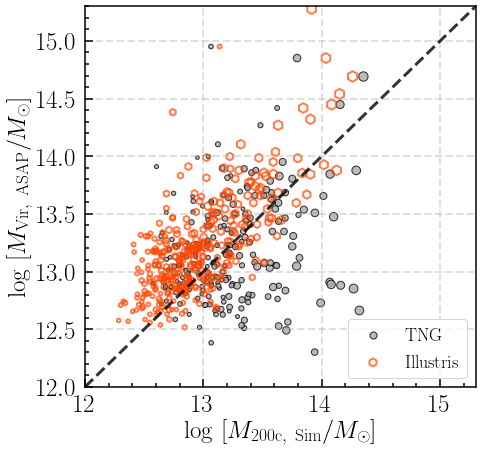

In [63]:
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(111)
ax1.grid(linestyle='--', alpha=0.4, linewidth=2)

ax1.scatter(tng_galaxies['logm200c'][tng_cen] - np.log10(0.7), tng_mh_xy[tng_cen], 
            facecolor='darkgrey', edgecolor='k', alpha=0.8,
            s=(tng_galaxies['logms'][tng_cen] - 11.0) * 60, label=r'$\rm TNG$')

ax1.scatter(ori_galaxies['logm200c'][ori_cen] - np.log10(0.7), ori_mh_xy[ori_cen], 
            edgecolor='orangered', facecolor='none', linewidth=2.0,
            marker='h', alpha=0.7, s=(ori_galaxies['logms'][ori_cen] - 11.0) * 80, label=r'$\rm Illustris$')
                                     
ax1.plot([12.0, 15.9], [12.0, 15.9], c='k', linestyle='--', linewidth=3.0, alpha=0.8)

ax1.set_xlim(12.0, 15.3)
ax1.set_ylim(12.0, 15.3)

ax1.legend(loc='best', fontsize=18)

_ = ax1.set_xlabel(r'$\log\ [M_{\rm 200c,\ Sim}/M_{\odot}]$')
_ = ax1.set_ylabel(r'$\log\ [M_{\rm Vir,\ ASAP}/M_{\odot}]$')